In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.backend import backend as K

In [11]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


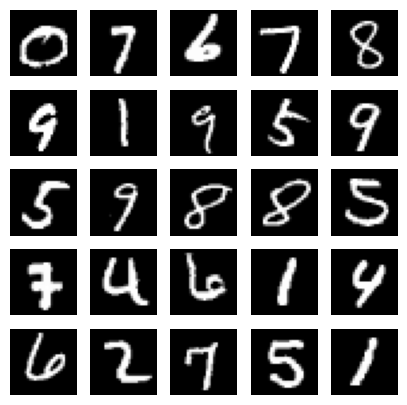

In [12]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap="gray")
    plt.axis("off")

plt.show()
plt.close("all")

In [13]:
from keras.utils import to_categorical

num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size

print(input_size)

x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype("float32") / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype("float32") / 255

784


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

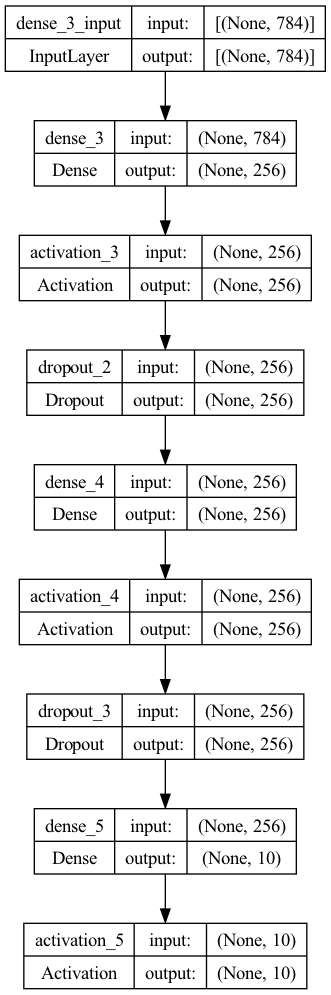

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam, RMSprop

from keras.utils import plot_model

batch_size = 128
hidden_units = 256
dropout = 0.45

model = Sequential([
    Dense(hidden_units, input_dim=input_size),
    Activation("relu"),
    Dropout(dropout),
    Dense(hidden_units),
    Activation("relu"),
    Dropout(dropout),
    Dense(num_labels),
    Activation("softmax"),
])

model.summary()
plot_model(model, show_shapes=True)

In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.4284 - accuracy: 0.8694
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1945 - accuracy: 0.9424
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1487 - accuracy: 0.9551
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1287 - accuracy: 0.9610
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1130 - accuracy: 0.9657
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1017 - accuracy: 0.9693
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0939 - accuracy: 0.9709
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0867 - accuracy: 0.9726
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0849 - accuracy: 0.9728
Epoch 10/20
469/469 [==============================] - 4s 7ms/step - loss: 0.0763 - accuracy: 0.976

In [16]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 4ms/step - loss: 0.0627 - accuracy: 0.9826

Test accuracy: 98.3%
